# MBA FIAP Inteligência Artificial & Machine Learning

<p align="center">
<img src="imagens/smart-hiring.jpg">
</p>

## Tecnologia de Processamento de Imagens
## Projeto Final Smart-Hiring: Entrevista Virtual

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas. Por meio uma trilha guiada para construir uma aplicação que tem por objetivo analisar imagens e extrair uma série de informações que serão utilizadas para compor uma análise de seleção de candidatos para uma entrevista simulada.

Este projeto poderá ser feita por grupos de até 4 pessoas.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| Integrante 1             | RM 12345      | `1IA` |
| Integrante 2             | RM 12345      | `1IA` |
| Integrante 3             | RM 12345      | `1IA` |
| Integrante 4             | RM 12345      | `1IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```## IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. 

**Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos, fotos e, até mesmo, trechos de código-fonte.**

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Detector de objeto (cartão de identificação)__
2. __Detector de faces__ 
http://localhost:8889/notebooks/MBA/fiap-ml-tec-proc-imagens/aula-4-deteccao-objetos/desafio-2/desafio-2-solucao.ipynb#
3. __Detector de sorriso__
http://localhost:8889/notebooks/MBA/fiap-ml-tec-proc-imagens/aula-5-classificacao-objetos/desafio-1/desafio-1-solucao.ipynb#

4. __Detector de bocejo__
5. __Detector de olhos fechados__
6. __Descritor de objetos na cena__
7. __Conclusões Finais__


## Introdução

_Disclaimer: as informações do caso de uso de negócio são meramente ilustrativas para aplicar as tecnologias de visão computacional de forma mais aderente ao desafio proposto. Todos os comentários foram forjados para dar vazão aos desafios e não representam formas de avaliação de candidatos. A empresa em questão, a Wandee, é fictícia._

A empresa **Wandee**, especializada em entrevistas virtuais, está construindo um produto minimamente viável (MVP) para testar algumas tecnologias voltadas a visão computacional para tornar o processo de seleção, especialmente a etapa de entrevista mais completo, rápido e que permita aos recrutadores obterem feedbacks mais completos além da profunidade técnica de cada posição, como por exemplo, se o candidato é ele mesmo (prova de identidade), se possuí o cartão de acesso a entrevista, aspectos de atenção durante a entrevista, como concentração e foco. Ainda será analisado questões de organização no local do entrevistado, buscando por objetos na visão da câmera.

Todo o processo de entrevista virtual é feito remotamente por meio de uma câmera (_webcam_). Logo, todos os algoritmos desenvolvidos precisam capturar as imagens desta origem.

## 1. Detector de objeto

Antes de começar com o processo de autenticação, os candidatos precisam utilizar o celular e exibir o ícone da empresa para a câmera. Se o resultado for positivo indica que o sistema pode avançar para a próxima etapa.

<p align="center">
<img src="imagens/logo.png" height="60%" width="60%">
</p>

Construa um algortimo que seja capaz de analisar uma região de interesse específica (ROI, _Region of Interest_), capturada por vídeo, e valide se o ícone está presente ao ser exibido pelo celular do candidato. 

Lembre-se que questões de proporção e rotação precisam ser consideradas na identificação.

Este processo precisa ser de rápida identificação, neste caso não será possível aplicar técnicas que envolvam aprendizado de máquina. É indicado o uso de detectores de objetos e extratores de características.

_No seu smartphone abra o navegador e entre com o link https://raw.githubusercontent.com/michelpf/fiap-ml-tec-proc-imagens-capstone/master/projeto-final/imagens/logo.png_

Ou, escaneie com seu smartphone o QRCode abaixo.

<p align="center">
<img src="imagens/qrcode.png" height="25%" width="25%">
</p>

In [ ]:
#pip install seaborn

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
from scipy.spatial import distance as dist
import collections
from matplotlib.pyplot import figure

%matplotlib inline

A função abaixo deve receber uma imagem capturada da região de interesse e comparar com a imagem template do logotipo de empresa. O retorno é o número de correspondências encontradas.

In [9]:
def detector(imagem, template):
    # Conversão da imagem par escala de cinza
    #imagem_norm = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

    # IMPLEMENTAR
    #
    # Escolha um detector de imagens adequado, configure e aplique um algoritmo de match
    # Esta função deve retornar o número de correspondências de uma imagem versus seu template
    
    
    #Treina Template
    
    #image_training = cv2.imread("imagens/hellmanns-logo.jpg")
    image_training = cv2.imread(str(template))
    image_training = cv2.cvtColor(image_training, cv2.COLOR_BGR2RGB)

    #plt.figure(figsize=(10,8))
    #plt.imshow(image_training)
    #plt.title("Training Logo")

    image_training_gray = cv2.cvtColor(image_training, cv2.COLOR_BGR2GRAY)
    
    
    # Para identificar todos os pontos, exclua o número do construtor abaixo
    orb_detector = cv2.ORB_create(1000)
    kps_training = orb_detector.detect(image_training_gray, None)
    kps_training, desc_training = orb_detector.compute(image_training_gray, kps_training)
    #print("Pontos detectados " + str(len(kps_training)))

 
    #Verifica Imagem enviada 
    
    image_query = cv2.imread(str(imagem))
    image_query = cv2.cvtColor(image_query, cv2.COLOR_BGR2RGB)

    image_query_gray = cv2.cvtColor(image_query, cv2.COLOR_BGR2GRAY)

    kps = orb_detector.detect(image_query_gray, None)
    kps_query, desc_query = orb_detector.compute(image_query_gray, kps)


    
    
    
    
    FLANN_INDEX_LSH = 6
    index_params= dict(algorithm = FLANN_INDEX_LSH, table_number = 6, key_size = 12, multi_probe_level = 1) 
    search_params = dict(checks=50)

    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(desc_training, desc_query, k=2)

    matchesMask = [[0,0] for i in range(len(matches))]

    good_matches = []

    for i,(m,n) in enumerate(matches):
        if m.distance < 0.8*n.distance:
            matchesMask[i]=[1,0]
            good_matches.append(m)

    #draw_params = dict(matchColor = (0,255,0), singlePointColor = (255,0,0), matchesMask = matchesMask, flags = 0)
    #image_detected = cv2.drawMatchesKnn(image_training_gray, kps_training, image_query_gray, kps_query, matches, None, **draw_params)

    #print(len(good_matches))
    
    
    

    return "MATCH DE " + str(len(good_matches)) + " PONTOS"

#cap = cv2.VideoCapture(0)

In [10]:



detector("imagens/01exercicio/teste_logo_capture.jpg", "imagens/01exercicio/teste_logo.png")

'MATCH DE 61 PONTOS'

## 2. Detector de faces

Para validação de autenticidade do candidado, o processo de entrevista virtual precisa confirmar se a pessoa selecionada para a entrevista é a mesma. Neste caso a técnica a ser utilizada é por meio de um reconhecimento facial,

Inicialmente, precisamos treinar um classificador próprio do OpenCV com exemplos de imagem do candidato.
Eleja uma pessoa do grupo para ser o candidato e treine um conjunto de imagens suficiente para que seja possível alcançar similaridade, onde o valor de não similaridade seja de até 40 pontos. O algortimo de similaridade de faces utiliza um sistema que quando a face é idêntica, o número de pontos é igual a 0, se for totalmente diferente, tende ao infinito. Logo, patamar de 30 a 40 é um bom número de similaridade.

**Implementação**

Nesta etapa inicial será realizado o treinamento das faces de um determinado candidato.
Você precisará coletar um número de imagens relevante do candidato. Além disso, é recomendável aplicação de um detector de faces para que seja extraído somente a _região de interesse_ ou seja, a própria face. Uma maneira de conseguir este tipo de segmentação é utilizando um classificador em cascada de Haar treinado para este fim.

Utilize a função a abaixo para segmentar o rosto de uma imagem.

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import glob

In [2]:
face_classifier = cv2.CascadeClassifier('classificadores/haarcascade_frontalface_default.xml')

# Extrator de faces
def face_extractor(img):
    try:
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray, 1.3, 5)

        if faces is ():
            return None

        for (x,y,w,h) in faces:
            cropped_face = img[y:y+h, x:x+w]
            
    except:
        return None

    return cropped_face

In [3]:
def normalizar_imagens(subject):
    list_files = []
    i = 1
    no_face = 0
    total = 0
    for file in glob.glob("imagens/02exercicio/victor/train/"+str(subject)+"/*"):
        total+=1
        image = cv2.imread(file);
        face = face_extractor(image)
        if face is not None:
            image_norm = cv2.resize(face, (200, 200))
            image_norm = cv2.cvtColor(image_norm, cv2.COLOR_BGR2GRAY)
            file_name_path = "imagens/02exercicio/victor/train/"+str(subject)+"/norm/"+str(i)+".png"
            cv2.imwrite(file_name_path, image_norm)
            list_files.append(file_name_path)
            i += 1
        else:
            no_face += 1
    print("Faces localizadas "+str(i) + "/" + str(total))
    return list_files


In [22]:
def treinamento():
    training_data, labels = [], []

    for subject in list(range(1,11)):
        print("Processando "+str(subject))
        files = normalizar_imagens(subject)

        # Lendo as imagens e associando a um label
        for i, file in enumerate(files):
            images = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
            training_data.append(np.asarray(images, dtype=np.uint8))
            labels.append(subject)

    # Criando uma matriz da lista de labels
    labels = np.asarray(labels, dtype=np.int32)
    return training_data, labels

In [23]:
training_data, labels = treinamento()

Processando 1
Faces localizadas 24/41
Processando 2
Faces localizadas 1/0
Processando 3
Faces localizadas 1/0
Processando 4
Faces localizadas 1/0
Processando 5
Faces localizadas 1/0
Processando 6
Faces localizadas 1/0
Processando 7
Faces localizadas 1/0
Processando 8
Faces localizadas 1/0
Processando 9
Faces localizadas 1/0
Processando 10
Faces localizadas 1/0


In [24]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
# Treinamento do modelo
model = cv2.face.LBPHFaceRecognizer_create()
model.train(np.asarray(training_data), labels)
print("Modelo treinado com sucesso.")

Modelo treinado com sucesso.


In [26]:
i = 1
no_face = 0
#for subject in list(range(1,11)):
for subject in list(range(1,2)):
    print("Analisando "+ str(subject))
    total = 0
    success = 0
    for file in glob.glob("imagens/02exercicio/victor/val/"+str(subject)+"/*"):
        total += 1
        image = cv2.imread(file);
        face = face_extractor(image)
        if face is not None:
            image_norm = cv2.resize(face, (200, 200))
            image_norm = cv2.cvtColor(image_norm, cv2.COLOR_BGR2GRAY)
            results = model.predict(image_norm)
            info = str(results[0]) + " " + str(int(results[1]))+" pontos"
            print(info)
            if results[0] == subject:
                success += 1
        else:
            no_face += 1
    print("Faces localizadas "+str(success) + "/" + str(total)+ " "+str(float(success)*100/float(total)) + "%")

Analisando 1
1 68 pontos
1 88 pontos
1 70 pontos
Faces localizadas 3/4 75.0%


In [18]:
import uuid
cap = cv2.VideoCapture(0)
contagem_maxima = 5
contagem = 0

while True:
    ret, image_frame = cap.read()

    if ret:
        cv2.imshow("Imagem de Treino", image_frame)
      
        
        if cv2.waitKey(1) == 13:
            cv2.imwrite("imagens/02exercicio/victor/train/" + str(uuid.uuid1()) + ".jpg", image_frame)
            contagem = contagem + 1
            
        # IMPLEMENTAR
        # Crie um algoritmo para salvar as imagens segmentadas em face em um determinado diretório
        
        # IMPLEMENTAR
        # Após teclar enter, armazene uma imagem para posterior análise
        if contagem == contagem_maxima:
            break
        
cap.release()
cv2.destroyAllWindows()
print("Coleta de amostras completado")



Coleta de amostras completado


## 3. Detector de sorriso

Muitas empresas demandam que futuros empregados demonstrem educação, tranquilidade e empatia, características que podem ser evidencias com uma uma análise simples da receptividade do candidado por meio das expressões de seu rosto.

Um detector importante disto é sobre se o candidato mantém o semblante fechado ou se mantém um rosto alegre, oscilando sorrisos a medida que é realizada a entrevista e demais questionamentos.

Utilize as bibliotecas do _DLib_, em especial o preditor treinado para 68 pontos de marcação de face, para identificar a geometria dela e obtenha as marcações de interesse.

Uma das formas de extraírmos os pontos de contorno da face é utilizando o modelo do _DLib_ ```shape_predictor_68_face_landmarks.dat```. Este modelo retorna 68 pontos da face

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
contSorrisos = 0
file = "imagens/02exercicio/imagem_sorriso.png"

In [2]:
def identificar_sorriso(imagem):
    face_classifier = cv2.CascadeClassifier('classificadores/haarcascade_frontalface_default.xml')
    smile_classifier = cv2.CascadeClassifier('classificadores/haarcascade_smile.xml')

    gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)

    if faces is ():
         cv2.putText(imagem, "ROSTO AUSENTE", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255), 2)

    for (x,y,w,h) in faces:
        
        cv2.rectangle(imagem, (x, y), (x+w, y+h), (0, 0, 255), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = imagem[y:y+h, x:x+w]
        
        smile = smile_classifier.detectMultiScale(
            roi_gray,
            scaleFactor= 1.7,
            minNeighbors=22,
            minSize=(25, 25),
            flags=cv2.CASCADE_SCALE_IMAGE
            )

        # Set region of interest for smiles
        for (x, y, w, h) in smile:
            cv2.rectangle(roi_color, (x, y), (x+w, y+h), (255, 0, 0), 1)
            tamanho = int(w) * int(h)
            cv2.putText(imagem, "SORRISO [%s]"%(tamanho), (50,80), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,0,0), 2)
            cv2.imwrite(file,imagem)
            global contSorrisos
            contSorrisos = contSorrisos + 1
            break

    return imagem

In [3]:
#cam_capture.release()
    
cam_capture = cv2.VideoCapture(0)
cv2.destroyAllWindows()

while True:
    ret, image_frame = cam_capture.read()
    if ret:
        image_frame = identificar_sorriso(image_frame)
        cv2.imshow("Detector de Rostos", image_frame)
        if cv2.waitKey(1) == 13:
            break
    else:
        break
        
cam_capture.release()
cv2.destroyAllWindows()
global contSorrisos
print('Quantidade de sorrisos = ', contSorrisos)
print('Imagem armazenada em: ', file)


Quantidade de sorrisos =  141
Imagem armazenada em:  imagens/02exercicio/imagem_sorriso.png


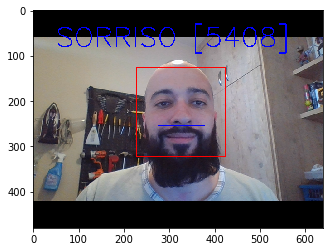

In [4]:
import matplotlib.image as mpimg
image = mpimg.imread(file)
plt.imshow(image)

## 4. Detector de bocejos

Os candidados devem estar sempre atentos durante a entrevista virtual. Para garantir que ele se preparou adequadamente antes do início da entrevista não deverá ser tolerado bocejos.

Um detector de bocejos deverá utilizar aspectos das marcações dos lábios já definidas para identificar o bocejo. Neste caso o que será diferente é o valor da razão de aspecto.

Neste caso não há um limiar, como o bocejo é a boca aberta ao máximo, vamos definir um valor mínimo.

In [ ]:
#Minha resolucao

In [5]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
print(cv2.__version__)

#Pop-up do Matplotlib
#%matplotlib qt

#Exibição na mesma tela do Jupyter
%matplotlib inline

#plt.rcParams["figure.figsize"]\
#(8,5)

from io import BytesIO
from IPython.display import clear_output, Image, display
import PIL

import datetime

import dlib

plt.style.use('seaborn')
sns.set_style("whitegrid", {'axes.grid' : False})

3.4.3


In [6]:
import dlib
import numpy 

predictor_68_path = "modelos/shape_predictor_68_face_landmarks.dat"

classificador = dlib.shape_predictor(predictor_68_path)
detector = dlib.get_frontal_face_detector()

In [7]:
FACE = list(range(17, 68))
LABIO = list(range(48, 61))
SOMBRANCELHA_DIREITA = list(range(17, 22))
SOMBRANCELHA_ESQUERDA = list(range(22, 27))
OLHO_DIREITO = list(range(36, 42))
OLHO_ESQUERDO = list(range(42, 48))
NARIZ = list(range(27, 35))
MANDIBULA = list(range(0, 17))

In [8]:
def annotate_landmarks_convex_hull_image(im):
    im = im.copy()
    retangulos = detector(im, 1)
    
    if len(retangulos) == 0:
        return im, 0
    
    marcos = []
    
    for retangulo in retangulos:
        landmarks = np.matrix([[p.x, p.y] for p in classificador(im, retangulo).parts()])

        for k, d in enumerate(retangulos):
            cv2.rectangle(im, (d.left(), d.top()), (d.right(), d.bottom()), (255, 0, 255), 2)

            pontos = cv2.convexHull(landmarks[NARIZ])
            cv2.drawContours(im, [pontos], 0, (0, 255, 0), 2)

            pontos = cv2.convexHull(landmarks[LABIO])
            cv2.drawContours(im, [pontos], 0, (0, 255, 0), 2)

            area_boca = cv2.contourArea(pontos)   
            cv2.putText(im, "Boca "+str(area_boca), (d.left(),d.top()-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
            
            pontos = cv2.convexHull(landmarks[SOMBRANCELHA_DIREITA])
            cv2.drawContours(im, [pontos], 0, (0, 255, 0), 2)

            pontos = cv2.convexHull(landmarks[SOMBRANCELHA_ESQUERDA])
            cv2.drawContours(im, [pontos], 0, (0, 255, 0), 2)

            pontos = cv2.convexHull(landmarks[OLHO_DIREITO])
            cv2.drawContours(im, [pontos], 0, (0, 255, 0), 2)

            pontos = cv2.convexHull(landmarks[OLHO_ESQUERDO])
            cv2.drawContours(im, [pontos], 0, (0, 255, 0), 2)

    return im, area_boca

In [9]:
#funcao para exibicao de bocejos
def exibir_imagem(imagem):
    #exibe imagem 
    imagem = cv2.imread("imagens/04exercicio/" + imagem)
    plt.figure(figsize=(20,10))
    plt.imshow(imagem)
    plt.title("Exemplo")

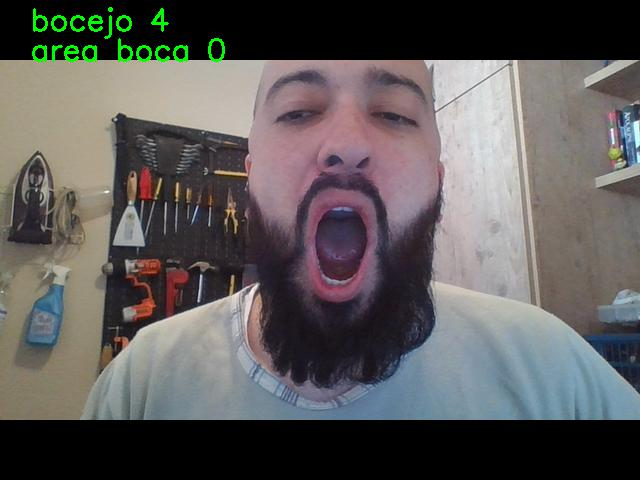

In [ ]:
#cam_capture.release()
   
cam_capture = cv2.VideoCapture(0)

qtde_bocejos = 0

nome_imagem = ""

bocejo = False

try:
    while True:
        ret, image_frame = cam_capture.read()
        prev_bocejo = bocejo 

        if ret:
            image_frame, area_boca = annotate_landmarks_convex_hull_image(image_frame)

            if area_boca > 4100:
                bocejo = True
            else:
                bocejo = False

            if prev_bocejo == True and bocejo == False:
                qtde_bocejos += 1
                nome_imagem = "camera_output_teste_" + str(qtde_bocejos) + ".png"
                #Grava bocejos na pasta
                cv2.imwrite("imagens/04exercicio/" + nome_imagem, image_frame)
                #Exibe Bocejos
                exibir_imagem(nome_imagem)

            cv2.putText(image_frame, "bocejo "+str(qtde_bocejos), (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
            cv2.putText(image_frame, "area boca "+str(area_boca), (30, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
           
            image_frame = cv2.cvtColor(image_frame, cv2.COLOR_BGR2RGB)
            
            cv2.imwrite("imagens/04exercicio/camera_output_2.png", image_frame)
            
            img = PIL.Image.fromarray(image_frame, "RGB")
            buffer = BytesIO()
            img.save(buffer,format="JPEG")        
            display(Image(data=buffer.getvalue()))

            clear_output(wait=True)
        
except KeyboardInterrupt:
    cam_capture.release()
    print("Interrompido")

## 5. Detector de olhos fechados

A atenção durante um processo de entrevista é algo crucial, e mais marcante neste etapa do processo seletivo. Por esta razão é preciso identificar a quantidade de vezes que o entrevistado feche os olhos, para entendermos se ele de fato está atento as perguntas e ao processo como um todo.

Elabore um algoritmo que detecte os olhos fechados e contabilize ao final da transmissão.

Este caso requer um estudo também geométrico que visa analisar os pontos da marcação dos olhos. Para fins de simplificação, podemos adotar um único olho, e a partir dele, estebelecer o razão de aspecto para quando ele está aberto e fechado.

Construa uma função chamada ```eye_aspect_ratio``` para calcular o aspecto de razão de um dos olhos.

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
print(cv2.__version__)
%matplotlib inline
from io import BytesIO
from IPython.display import clear_output, Image, display
import PIL
import datetime
import dlib

plt.style.use('seaborn')
sns.set_style("whitegrid", {'axes.grid' : False})

3.4.3


In [2]:
import dlib
import numpy 

predictor_68_path = "modelos/shape_predictor_68_face_landmarks.dat"
classificador = dlib.shape_predictor(predictor_68_path)
detector = dlib.get_frontal_face_detector()

In [3]:
def eye_aspect_ratio(im):
    im = im.copy()
    retangulos = detector(im, 1)
    
    if len(retangulos) == 0:
        return im, 0
    
    marcos = []
    
    for retangulo in retangulos:
        landmarks = np.matrix([[p.x, p.y] for p in classificador(im, retangulo).parts()])

        for k, d in enumerate(retangulos):
            cv2.rectangle(im, (d.left(), d.top()), (d.right(), d.bottom()), (255, 0, 255), 2)

            #pontos = cv2.convexHull(landmarks[NARIZ])
            #cv2.drawContours(im, [pontos], 0, (0, 255, 0), 2)

            #pontos = cv2.convexHull(landmarks[LABIO])
            #cv2.drawContours(im, [pontos], 0, (0, 255, 0), 2)

            #area_boca = cv2.contourArea(pontos)   
            #cv2.putText(im, "Boca "+str(area_boca), (d.left(),d.top()-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
            
            #pontos = cv2.convexHull(landmarks[SOMBRANCELHA_DIREITA])
            #cv2.drawContours(im, [pontos], 0, (0, 255, 0), 2)

            #pontos = cv2.convexHull(landmarks[SOMBRANCELHA_ESQUERDA])
            #cv2.drawContours(im, [pontos], 0, (0, 255, 0), 2)
            
            pontos = cv2.convexHull(landmarks[OLHO_DIREITO])
            cv2.drawContours(im, [pontos], 0, (0, 255, 0), 2)
            area_olho_direito = cv2.contourArea(pontos)   
            cv2.putText(im, "Olho direito "+str(area_olho_direito), (d.left(),d.top()-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

            pontos = cv2.convexHull(landmarks[OLHO_ESQUERDO])
            cv2.drawContours(im, [pontos], 0, (0, 255, 0), 2)

    return im, area_olho_direito

Altere a função ```annotate_landmarks_convex_hull_image``` para exibir, no terceiro parâmetro o valor de aspecto de um dos olhos.

No caso do olho, precisamos definir somente um valor máximo de limite.

In [4]:
FACE = list(range(17, 68))
OLHO_DIREITO = list(range(36, 42))
OLHO_ESQUERDO = list(range(42, 48))

In [5]:
#funcao para exibicao
def exibir_imagem(imagem):
    #exibe imagem 
    imagem = cv2.imread("imagens/05exercicio/" + imagem)
    plt.figure(figsize=(20,10))
    plt.imshow(imagem)
    plt.title("Exemplo")

Interrompido


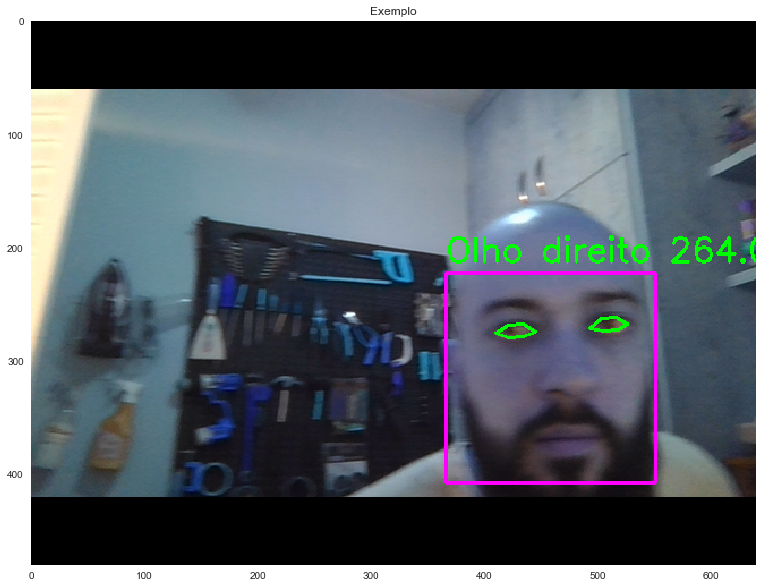

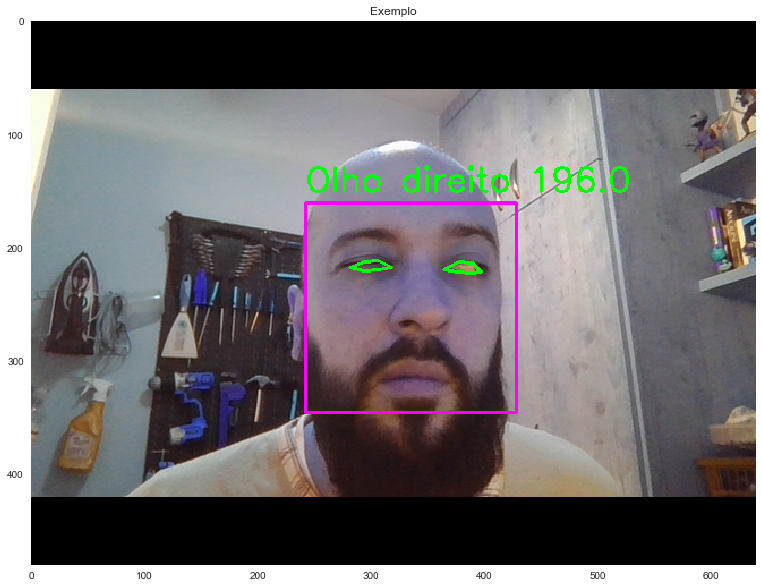

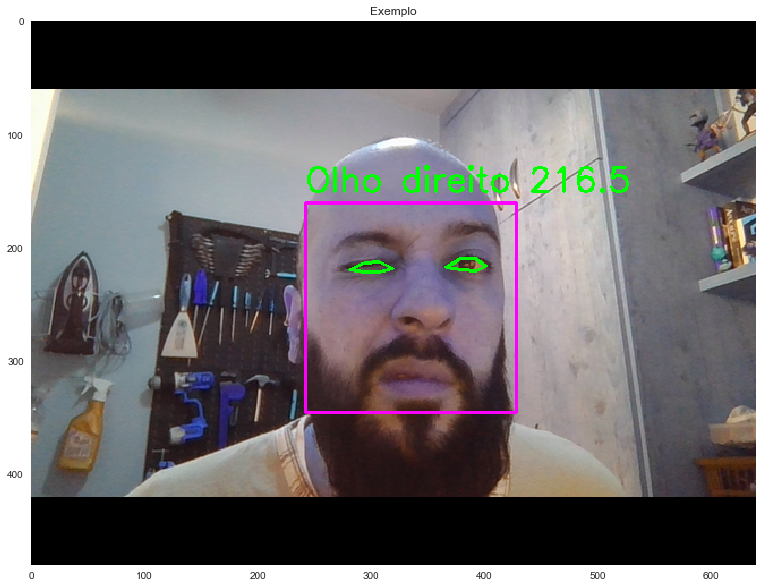

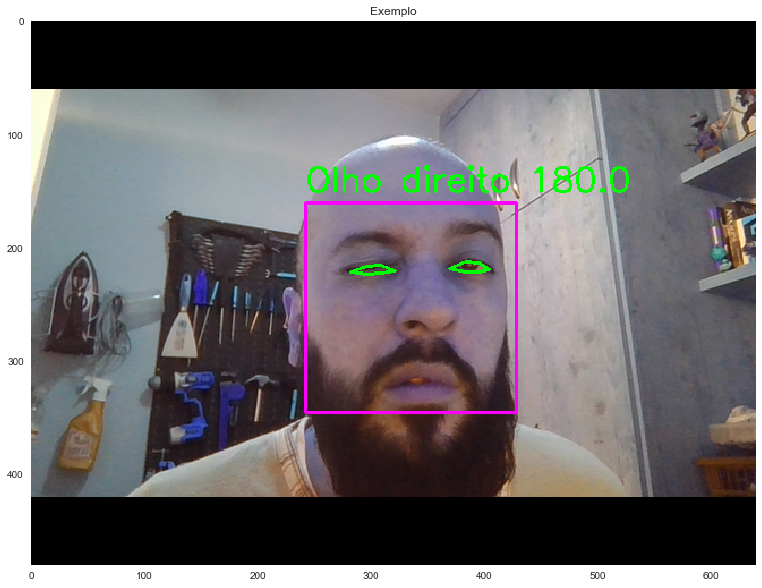

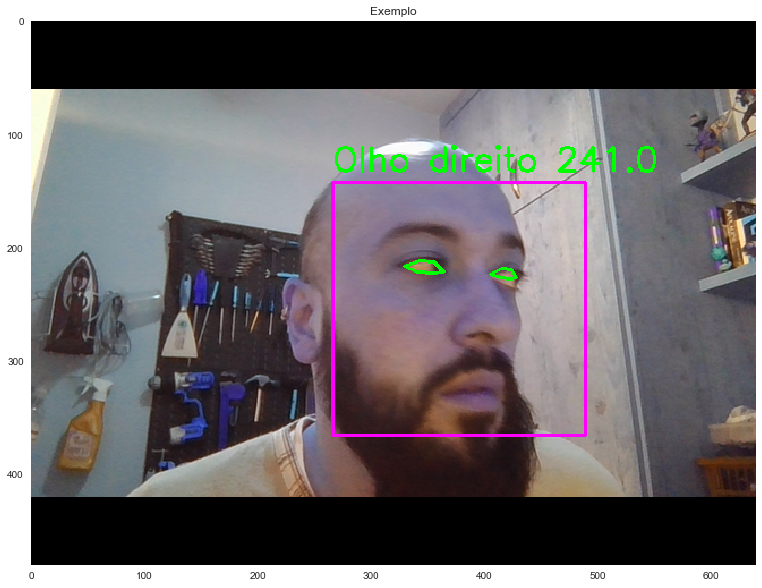

In [7]:
   
cam_capture = cv2.VideoCapture(0)

qtde_piscadas = 0

nome_imagem = ""

piscada = False

try:
    while True:
        ret, image_frame = cam_capture.read()
        prev_piscada = piscada 

        if ret:
            image_frame, area_olho_direito = eye_aspect_ratio(image_frame)

            if area_olho_direito < 180:
                piscada = True
            else:
                piscada = False

            if prev_piscada == True and piscada == False:
                qtde_piscadas += 1
                nome_imagem = "camera_output_teste_" + str(qtde_piscadas) + ".png"
                #Grava piscadas na pasta
                cv2.imwrite("imagens/05exercicio/" + nome_imagem, image_frame)
                #Exibe Piscadas
                exibir_imagem(nome_imagem)

            cv2.putText(image_frame, "piscada "+str(qtde_piscadas), (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
            cv2.putText(image_frame, "area olho_direito "+str(area_olho_direito), (30, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
           
            image_frame = cv2.cvtColor(image_frame, cv2.COLOR_BGR2RGB)
            
            cv2.imwrite("imagens/05exercicio/camera_output_2.png", image_frame)
            
            img = PIL.Image.fromarray(image_frame, "RGB")
            buffer = BytesIO()
            img.save(buffer,format="JPEG")        
            display(Image(data=buffer.getvalue()))

            clear_output(wait=True)
        
except KeyboardInterrupt:
    cam_capture.release()
    print("Interrompido")

## 6. Descritor de objetos na cena

A organização do local na casa do entrevistado é um item relevante, pois a partir destes detalhes é possível traçar alguns tipos de perfis que são essenciais para certas posições nas empresas.

Desta forma precisamos construir um algoritmo que realize uma inspeção de objetos na área da câmera que é utilizada para fazer a entrevista. Ao final mostre quais e quantos objetos foram detectados.

É necessário baixar os pesos (modelo de deep-learning) neste link https://pjreddie.com/media/files/yolov3.weights e copiar para  pasta weights.

In [11]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from utils import *
from darknet import Darknet
from collections import Counter
import collections
from matplotlib.pyplot import figure
import matplotlib.image as mpimg

In [12]:


# Configurações na rede neural YOLOv3
cfg_file = 'cfg/yolov3.cfg'
m = Darknet(cfg_file)

# Pesos pré-treinados
weight_file = 'weights/yolov3.weights'
m.load_weights(weight_file)

# Rótulos de classes
namesfile = 'data/coco.names'
class_names = load_class_names(namesfile)

Ajuste os valores de NMS (_Non-Maximum Supression_) para regular a sensibilidade de imagens com baixa luminosidade e IOU (_Intersect of Union_) que definie o indicador se o retângulo de identificação de imagem foi adequadamente desenhado.

In [13]:
# IMPLEMENTAR
# Definia apropriadamente os valores de limiar de NMS e IOU

nms_thresh = 0.1
iou_thresh = 0.7

Separe um imagem que será analisada pelo classificador, após teclar o _Enter_. Armazene no diretório ```imagens/local-entrevista.png```.

In [14]:
#cam_capture = cv2.VideoCapture(0)

#while True:
    #ret, image_frame = cam_capture.read()
    
    #if ret:
        #cv2.imshow("Inspecao Local", image_frame)
        
        # IMPLEMENTAR
        # Após teclar enter, armazene uma imagem para posterior análise
        
#cam_capture.release()
#cv2.destroyAllWindows()

In [19]:


cap = cv2.VideoCapture(0)

while True:
    ret, image_frame = cap.read()

    if ret:
        cv2.imshow("Imagem de Treino", image_frame)
      
        
        # IMPLEMENTAR
        # Crie um algoritmo para salvar as imagens segmentadas em face em um determinado diretório
        
        # IMPLEMENTAR
        # Após teclar enter, armazene uma imagem para posterior análise
        if cv2.waitKey(1) == 13:
            cv2.imwrite("imagens/06exercicio/teste1.jpg", image_frame)
            break
        
cap.release()
cv2.destroyAllWindows()
print("Coleta de amostras completado")




Coleta de amostras completado


A imagem a ser analisada.

In [20]:
def exibir_imagem(imagem):
    figure(num=None, figsize=(15, 10))
    image_plt = mpimg.imread(imagem)
    plt.imshow(image_plt)
    plt.axis('off')
    plt.show()

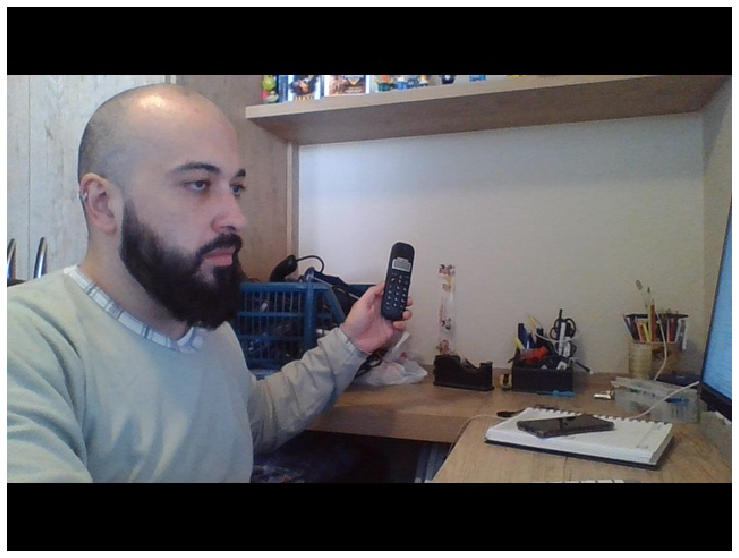

In [21]:
# IMPLEMENTAR
# Altere abaixo o parâmetro de entrada para o caminho onde a imagem foi armazenada

exibir_imagem('imagens/06exercicio/teste1.jpg')

Os passos abaixo são para configuração da imagem no padrão que o classificador foi treinado.

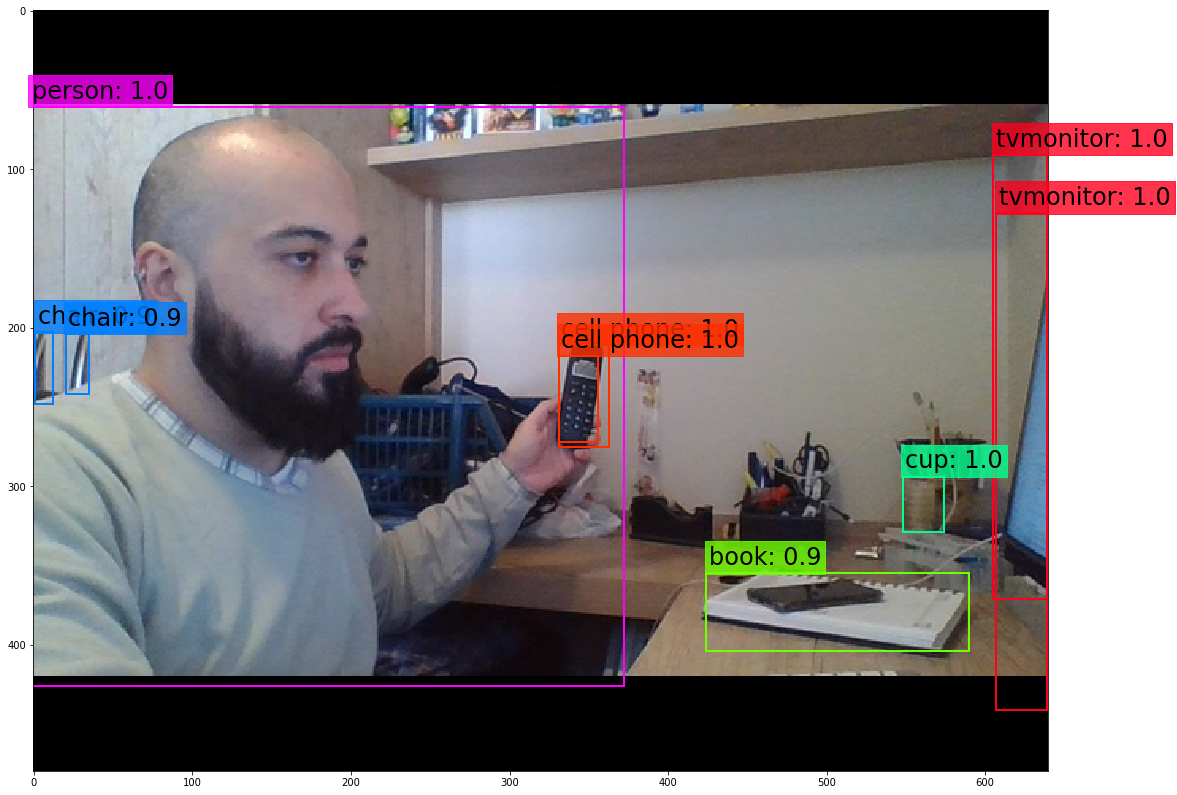

In [22]:
# Definindo tamnaho do gráfico
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Carregar imagem para classificação
img = cv2.imread('imagens/06exercicio/teste1.jpg')

# Conversão para o espaço RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Redimensionamento para adatapção da primeira camada da rede neural 
resized_image = cv2.resize(original_image, (m.width, m.height))

# Deteteção de objetos na imagem
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

# Desenho no gráfico com os regângulos e rótulos
plot_boxes(original_image, boxes, class_names, plot_labels = True)

Obtenha os objetos identificados a partir da função ```list_objects(boxes, class_names)```. Será retornardo uma lista de objetos que deverá ser analisado para contar a quantidade de cada objeto. Se houver mais de um item igual, por exemplo _tvmonitor_ ele aparecerá duplicado na imagem.

Objects Found and Confidence Level:

1. person: 1.000000
2. cell phone: 0.999997
3. cup: 0.999991
4. book: 0.870480
5. tvmonitor: 0.998634
6. cell phone: 0.999953
7. chair: 0.935430
8. chair: 0.945259


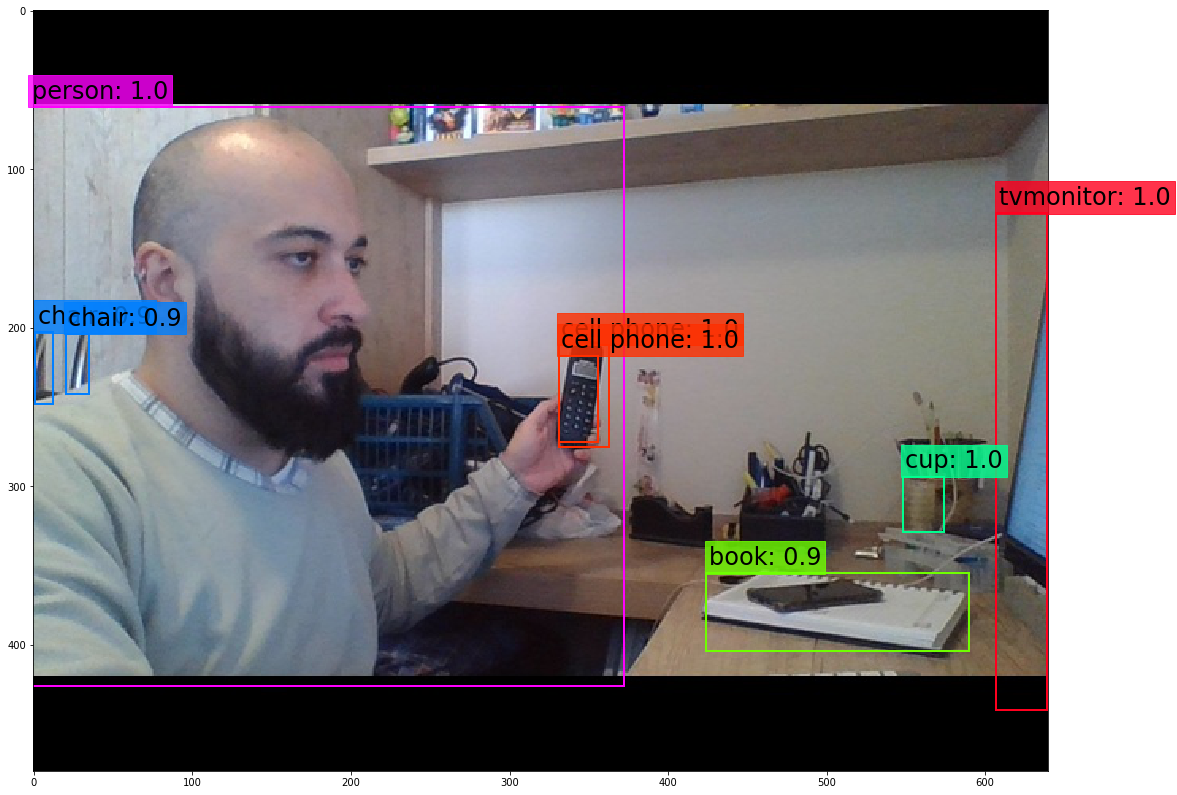

In [23]:
# Patamar de NMS (Non-Maximum Supression)
# Ajuste de sensibilidade de imagens com baixa luminosidade
nms_thresh = 0.2
# Patamar do IOU (Intersect of Union), indicador se o retângulo 
# de identificação de imagem foi adequadamente desenhado
iou_thresh = 0.7

# Definindo tamnaho do gráfico
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Deteteção de objetos na imagem
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

# Objetos encontrados e nível de confiança
print_objects(boxes, class_names)

# Desenho no gráfico com os regângulos e rótulos
plot_boxes(original_image, boxes, class_names, plot_labels = True)

In [24]:
# IMPLEMENTAR
# Conte os objetos identificados pelo classificador, de forma que seja exibido 
# objeto 1, quantidade 1
# objeto 2, quantidade 1
# ...

objetos = list_objects(boxes, class_names)

In [25]:
counter_objects = Counter(objetos)

In [26]:
counter_objects

Counter({'person': 1,
         'cell phone': 2,
         'cup': 1,
         'book': 1,
         'tvmonitor': 1,
         'chair': 2})

## Conclusões finais

**Pergunta:** Diante de todos os desafios propostos (1 ao 6) e soluções encontradas, quais seriam os próximos passos de forma a tornar mais precisos cada atividade, levando em consideração: (1) restrições de processamento em tempo real, (2) sem restrições de processamento em tempo real?

Por se tratar de visão computacional, quanto melhor tratarmos as imagens e ela tiver melhor adequada aos algoritmos utilizados, melhor vai ser o resultado. Creio que criando funções que identifique melhor o ambiente que esta sendo feito a análise, como profundidade, luminosidade sempre vamos conseguir um melhor resultado. Algo que tambem pode ser levado em consideração, seria a questão da qualidade da imagem, pois para algum dos desafios proposto não era preciso ter uma resolução alta, ou a imagem com cores, dessa maneira, diminuindo a resolução ou até deixo a imagem em preto/branco, poderia ser algo bem proveitoso, ja que a análise seria mais rápida e menos custosa.
